# Imports

In [5]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
from pandas import DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


# Dataset

    input_1   input_2  label
0 -3.755938  0.067538      1
1 -2.948434  0.365538      1
2 -3.367091 -0.303440      1
3  1.890244  2.869420      0
4 -4.770407 -1.330004      1


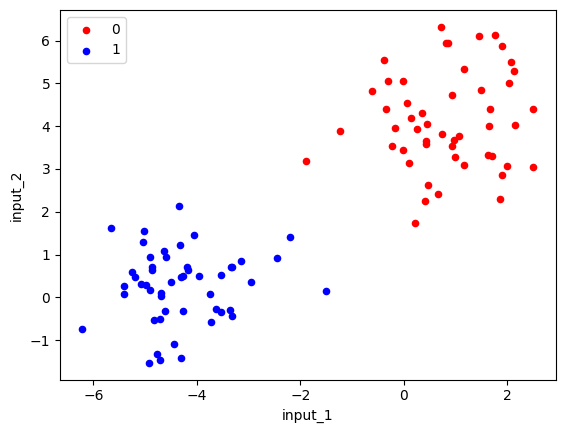

In [6]:
def prep_data():
    X, labels = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1, random_state=3)
    # labels = np.where(labels == 0, -1, 1)
    #df = DataFrame(dict(constant=np.repeat(1, len(X)), input_1=X[:,0], input_2=X[:,1], label=labels))
    df = DataFrame(dict(input_1=X[:,0], input_2=X[:,1], label=labels))
    print(df.head())
    colors = {1:'blue', 0:'red'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='input_1', y='input_2', label=key, color=colors[key])
    plt.show()
    #y = np.where(labels == 0, -1, 1)
    y = labels
    # sepal length and petal length # from sklearn.datasets.samples_generator import make_blobs
    X = df.iloc[0:100, [0,1]].values
    return X, y
X, y = prep_data()

# The Perceptron Implementation

In [7]:

class Perceptron(object):
# """Perceptron class

# Usage:
# ppn = Perceptron(epochs=10, lr=0.01)
# ppn.train(X, y) 
# ppn.plot_delta()

# Author: Uzair Ahmad
# """
    def __init__(self, lr=0.001, epochs=50):
        self.lr = lr
        self.epochs = epochs
        
    def predict(self, X):
        preds = np.dot(X, self.w_)
        return np.where(preds >= 0, 1, 0)
    
    def train(self, X, y):
        # Initialize weights
        self.w_ = np.random.randn(2)
        self.errors = []
        for epoch in range(self.epochs):
            # Calculate classification errors
            self.errors.append(np.sum(np.abs(y - self.predict(X))))
            self.plot_dr(X, y, title='epoch {0} \n w_1={1} w_2={2} Errors={3}'.format(epoch, np.round(self.w_[0],2), np.round(self.w_[1],2), 
                                                                                     int(np.sum(np.abs(y - self.predict(X))))))
            for xi, yi in zip(X, y):
                output = self.predict(xi)
                # calculate update 
                update = self.lr * (yi - output) * xi
                # Update w 
                self.w_ +=  update
                if np.all(update != 0):
                  self.plot_dr(X, y, title='epoch {0} \n w_1={1} w_2={2} Errors={3}'.format(epoch, np.round(self.w_[0],2), np.round(self.w_[1],2), 
                                                                                     int(np.sum(np.abs(y - self.predict(X))))))
        return self

    def plot_dr(self, X, y, title):
        plot_decision_regions(X, y, clf=self)
        plt.title(title)
        plt.xlabel('input 1')
        plt.ylabel('input 2')
        plt.show()    

    def plot_delta(self):
      plt.plot(range(1, len(self.errors)+1), self.errors, marker='o')
      plt.title('Errors / Epoch')
      plt.xlabel('Epochs')
      plt.ylabel('Error Count')
      plt.show()

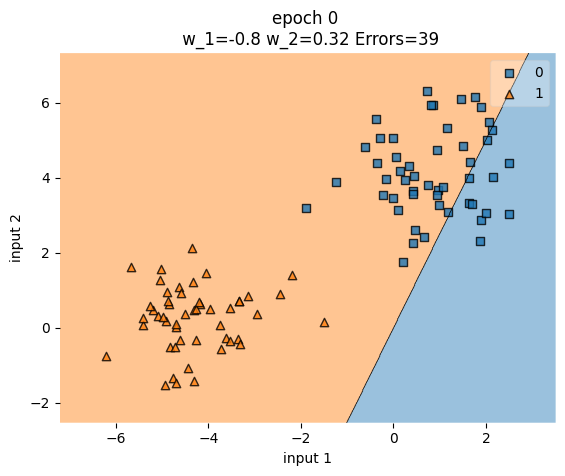

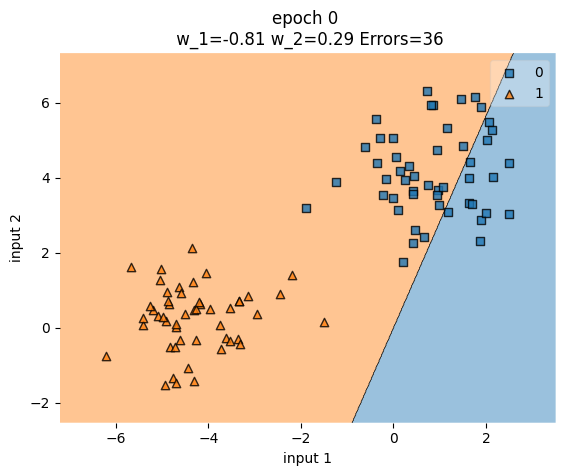

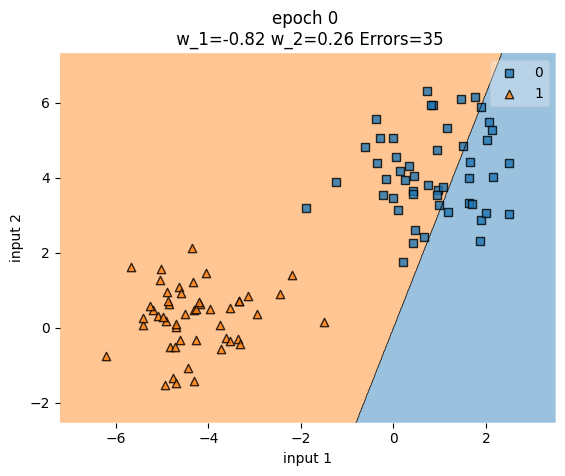

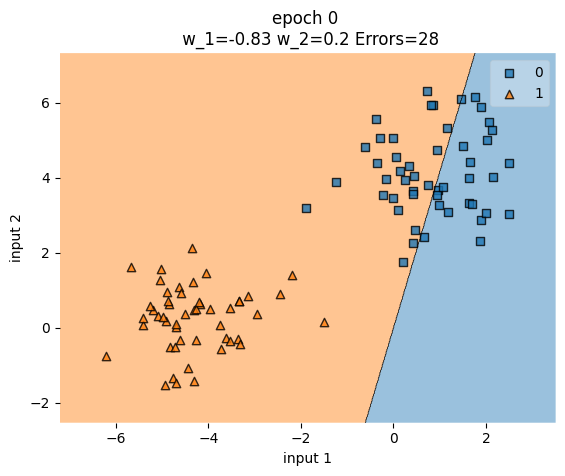

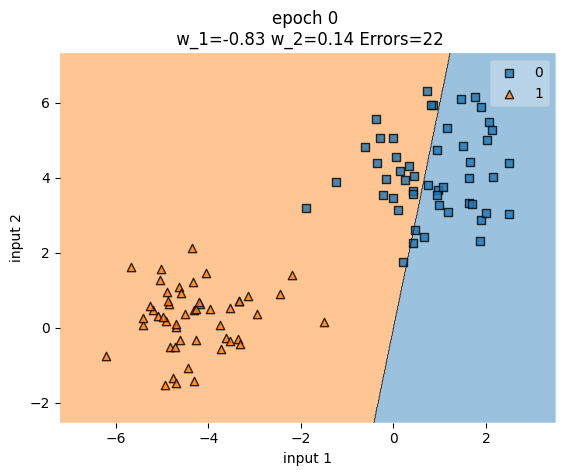

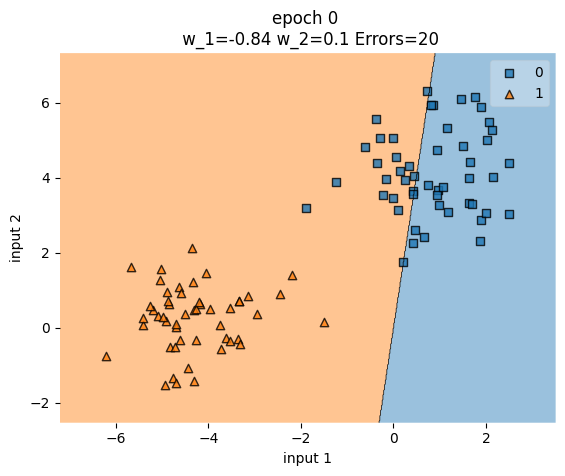

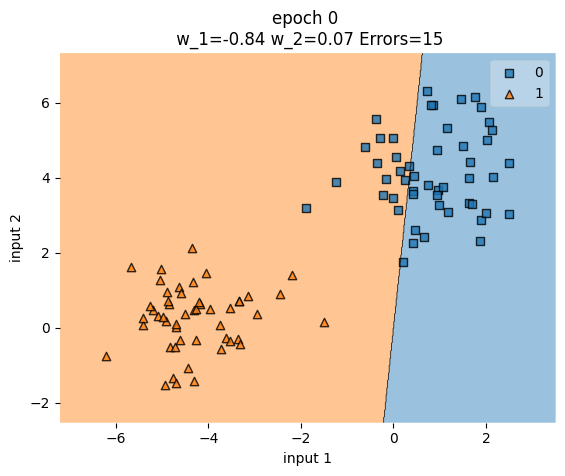

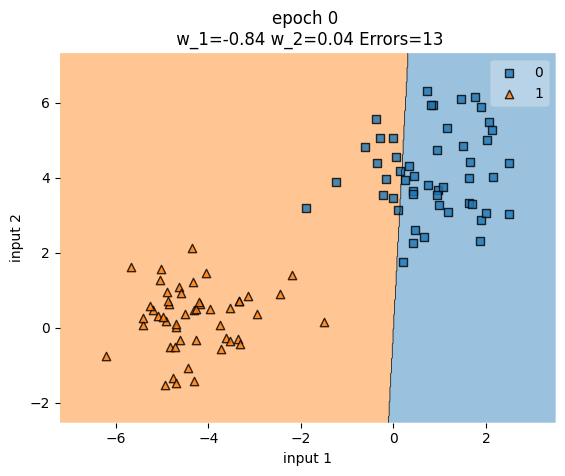

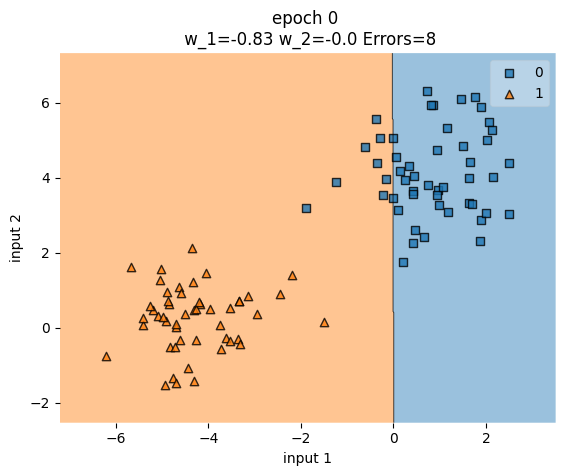

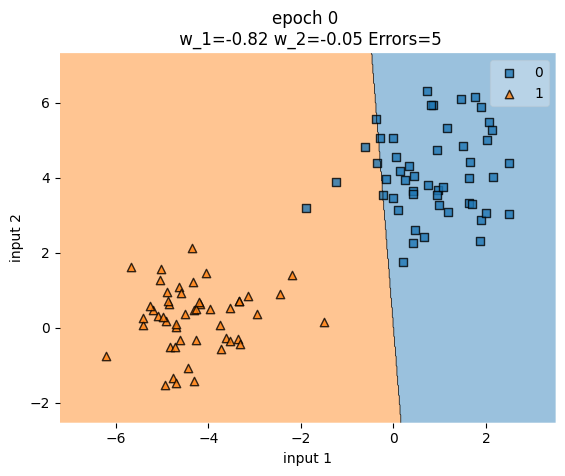

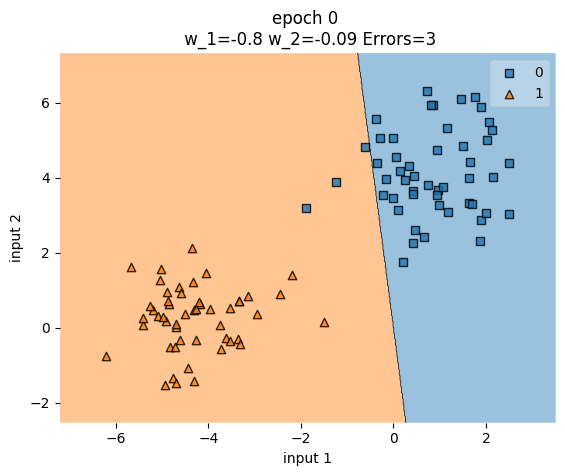

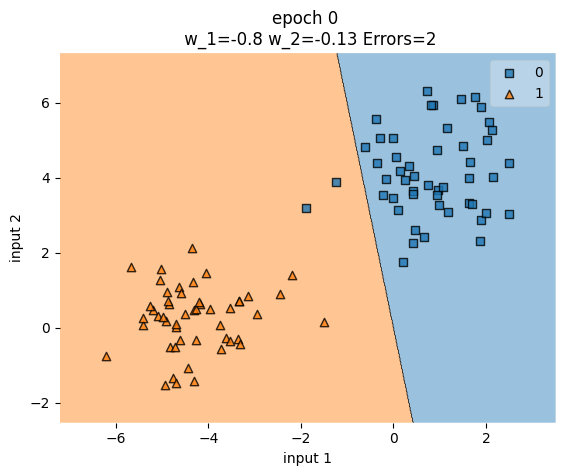

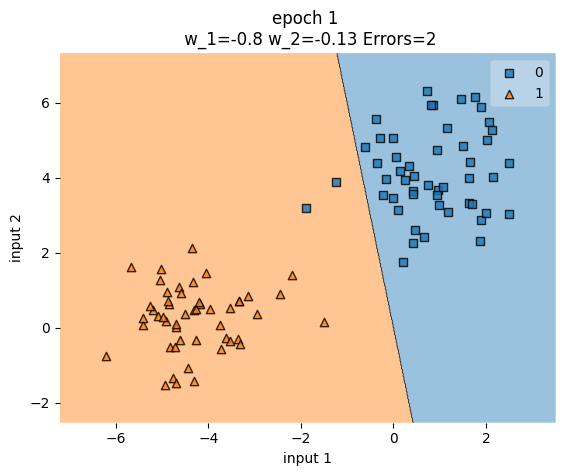

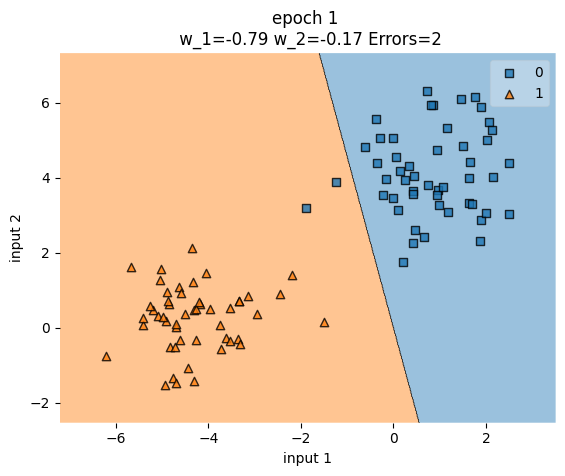

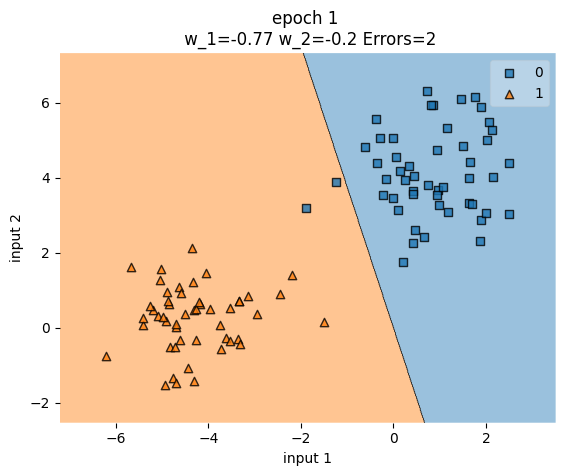

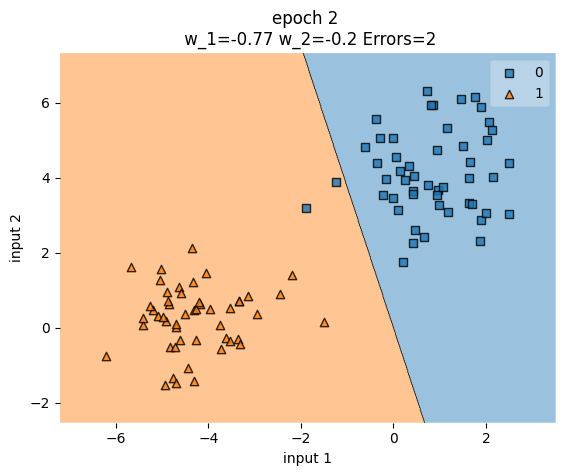

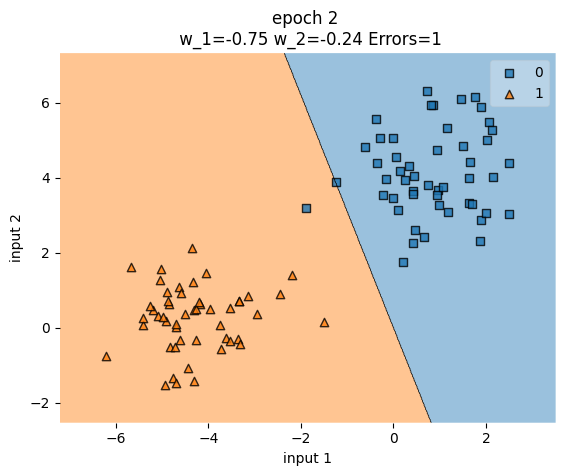

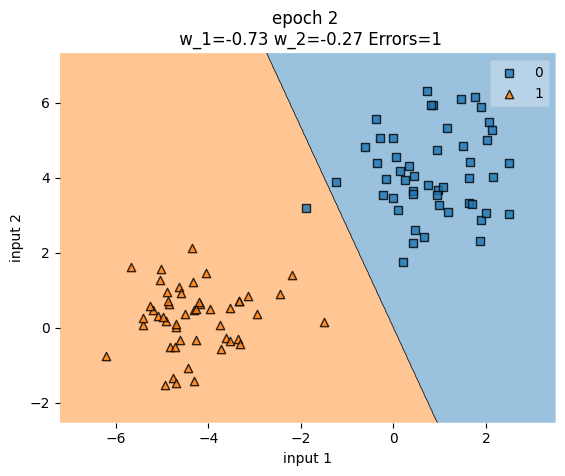

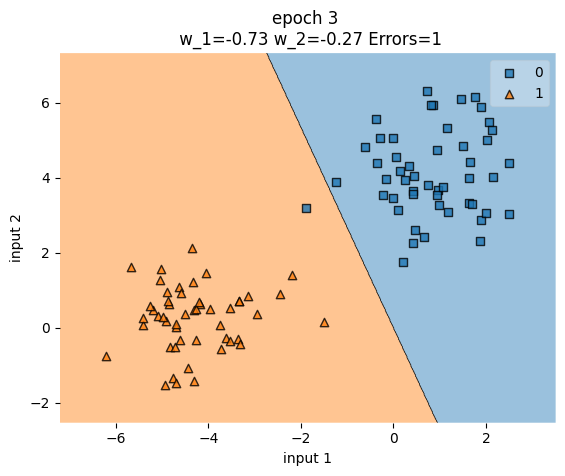

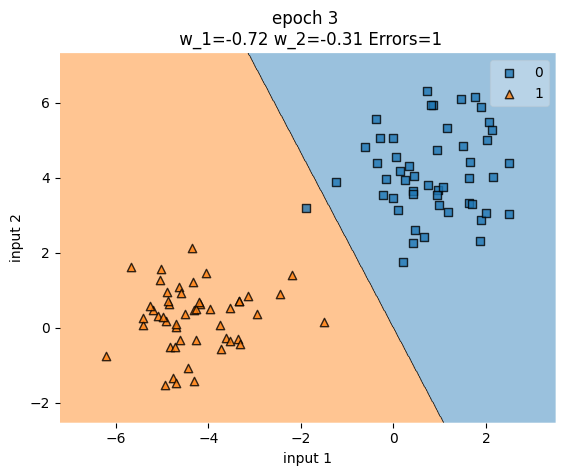

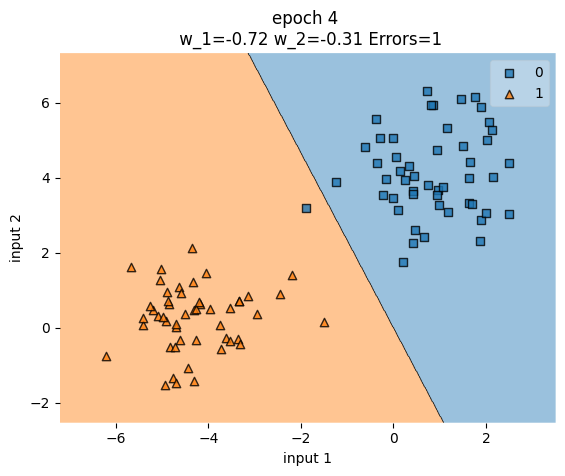

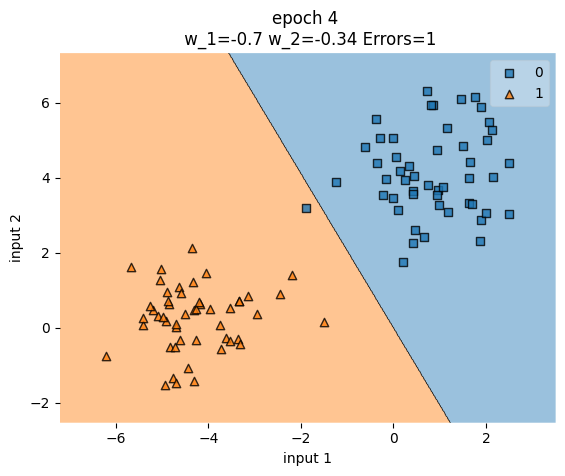

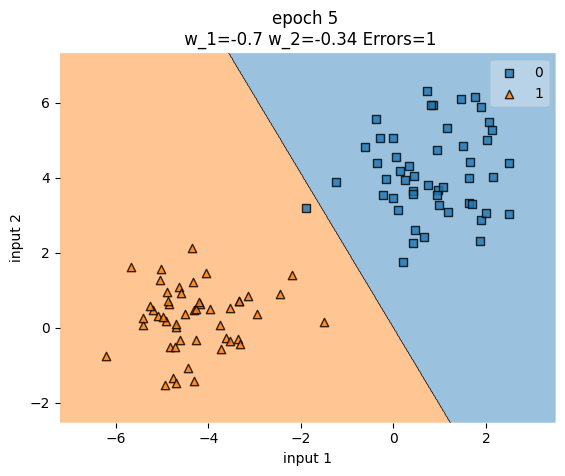

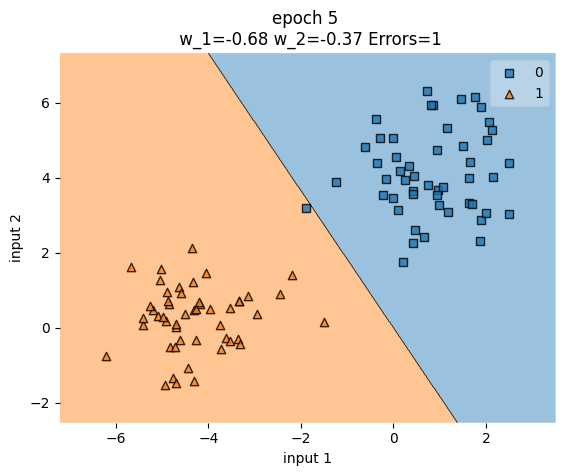

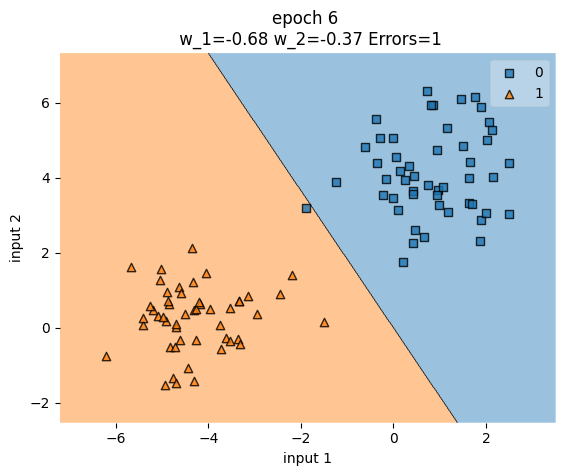

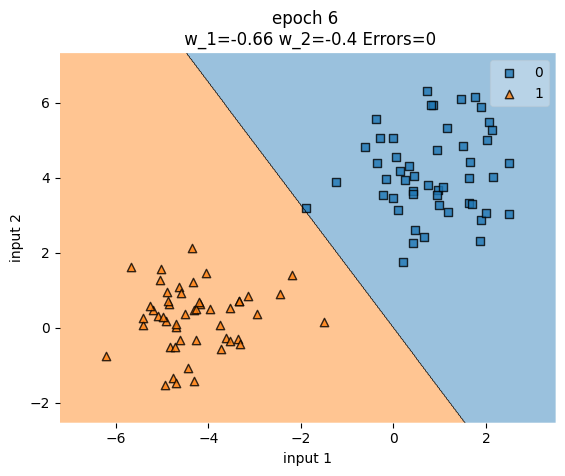

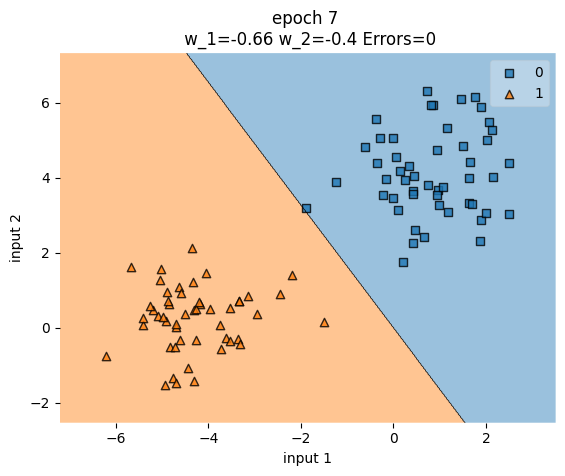

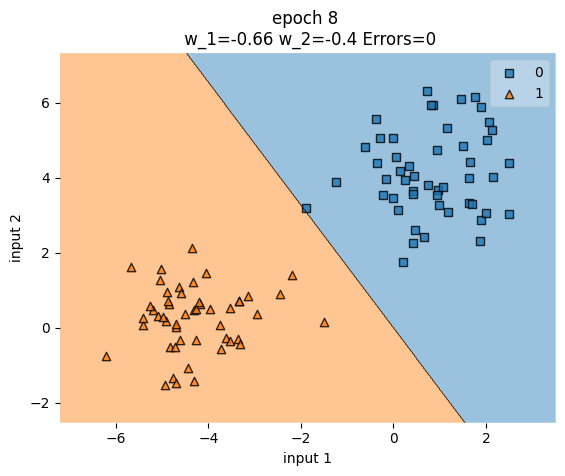

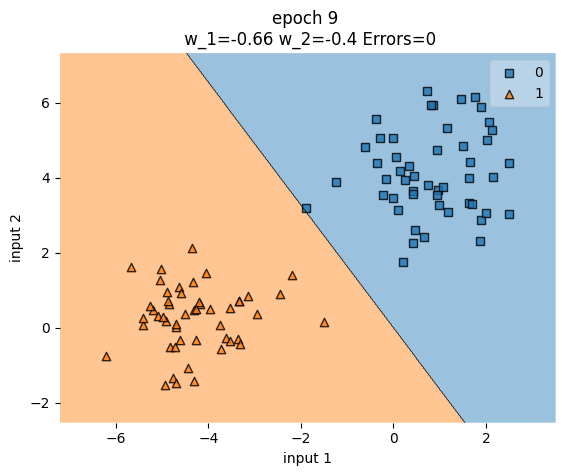

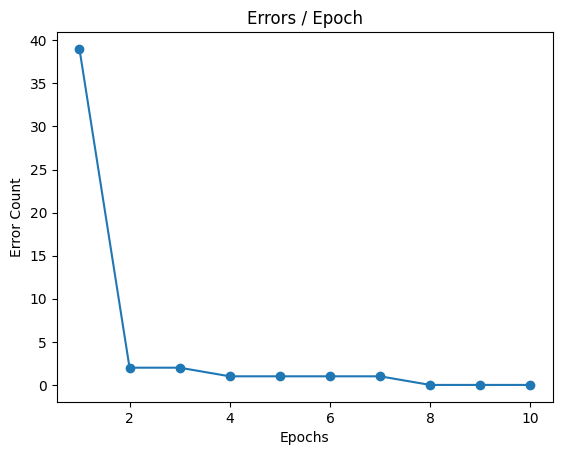

In [8]:
np.random.seed(1000)
ppn = Perceptron(epochs=10, lr=0.01)
ppn.train(X, y)
ppn.plot_delta()
W= np.asarray([-0.68, -0.4])

In [9]:
W= np.asarray([-0.68, -0.4])
magnitude_W = np.sqrt(np.dot(W, W))
l = []
for xi, yi in zip(X, y):
    magnitude_xi = np.sqrt(np.dot(xi, xi))
    theta = round(np.arccos(np.dot(W, xi)/(magnitude_W*magnitude_xi)), 2)
    l.append((xi, round(np.degrees(theta)), round(np.cos(theta),2), round(np.dot(W, xi),2), yi))
l.sort(key=lambda r:r[1])
l
# np.arccos(np.dot(W, np.sort(X.T))/np.linalg.norm(W)*np.linalg.norm(X))

[(array([-4.31126623, -1.40590907]), 13, 0.98, 3.49, 1),
 (array([-4.70716987, -1.45908253]), 13, 0.97, 3.78, 1),
 (array([-4.93524002, -1.52755815]), 13, 0.97, 3.97, 1),
 (array([-4.77040684, -1.33000372]), 15, 0.97, 3.78, 1),
 (array([-4.44314571, -1.08149453]), 17, 0.96, 3.45, 1),
 (array([-3.73612426, -0.56615694]), 22, 0.93, 2.77, 1),
 (array([-6.21229878, -0.74422301]), 23, 0.92, 4.52, 1),
 (array([-3.31907313, -0.43187992]), 23, 0.92, 2.43, 1),
 (array([-4.83031611, -0.52091273]), 24, 0.91, 3.49, 1),
 (array([-4.71248737, -0.51397454]), 24, 0.91, 3.41, 1),
 (array([-3.36709068, -0.30343965]), 25, 0.9, 2.41, 1),
 (array([-3.53407542, -0.34382131]), 25, 0.91, 2.54, 1),
 (array([-3.62319202, -0.26181256]), 26, 0.9, 2.57, 1),
 (array([-4.61279528, -0.32371816]), 26, 0.9, 3.27, 1),
 (array([-4.27714282, -0.31063568]), 26, 0.9, 3.03, 1),
 (array([-4.69855315,  0.02748044]), 31, 0.86, 3.18, 1),
 (array([-3.75593847,  0.06753833]), 32, 0.85, 2.53, 1),
 (array([-5.41754185,  0.07576566])

In [10]:
W = np.asarray([-0.68, -0.4])
magnitude_W = np.sqrt(np.dot(W, W))
X_ = np.asarray([[0, 2.0], [-2.0, 0.0]])
l = []
for xi in X_:
    print(xi)
    magnitude_xi = np.sqrt(np.dot(xi, xi))
    theta = round(np.arccos(np.dot(W, xi)/(magnitude_W*magnitude_xi)), 2)
    yi = 1 if np.dot(W, xi) >= 0 else 0
    l.append((xi, round(np.degrees(theta)), round(np.cos(theta),2), round(np.dot(W, xi),2), yi))
l.sort(key=lambda r:r[1])
l

[0. 2.]
[-2.  0.]


[(array([-2.,  0.]), 30, 0.86, 1.36, 1), (array([0., 2.]), 120, -0.5, -0.8, 0)]